In [3]:
from xgboost import XGBClassifier
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
# value for the random state 
RANDOM_STATE=55

In [4]:
# Parse data from csv
df=pd.read_csv('Iris.csv')
y=df['Species']
categories=list(set(y))
y=[categories.index(i) for i in y]
x=df.iloc[:,1:-2]
# Split data into train and test
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y,test_size=0.2,random_state=RANDOM_STATE)

In [5]:
# Print shape of data
print(x_train.shape,x_test.shape)
print(len(y_train),len(y_test))

(120, 3) (30, 3)
120 30


Text(0.5, 1.0, 'Sepal Length VS Width')

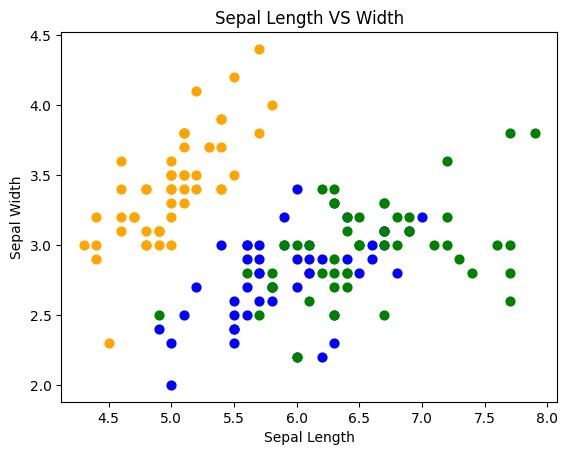

In [6]:
# Plot data
setosa=df[df['Species']=='Iris-setosa']
versicolor=df[df['Species']=='Iris-versicolor']
virginica=df[df['Species']=='Iris-virginica']
plt.scatter(color='orange',x=setosa['SepalLengthCm'],y=setosa['SepalWidthCm'],s=40,marker='o',label='Setosa')
plt.scatter(color='blue',x=versicolor['SepalLengthCm'],y=versicolor['SepalWidthCm'],s=40,marker='o',label='versicolor')
plt.scatter(color='green',x=virginica['SepalLengthCm'],y=virginica['SepalWidthCm'],s=40,marker='o',label='virginica')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Length VS Width")

In [7]:
# Define model and fit data
model=XGBClassifier().fit(x_train,y_train)
# Predict test data
y_test_pred=model.predict(x_test)
y_train_pred=model.predict(x_train)

In [8]:
# Calculate train accuracy
err=0
for i in range(len(y_train_pred)):
    if y_train_pred[i]==y_train[i]: err+=1
print(f"Training data accuracy is {err/len(y_train_pred)*100}")

Training data accuracy is 100.0


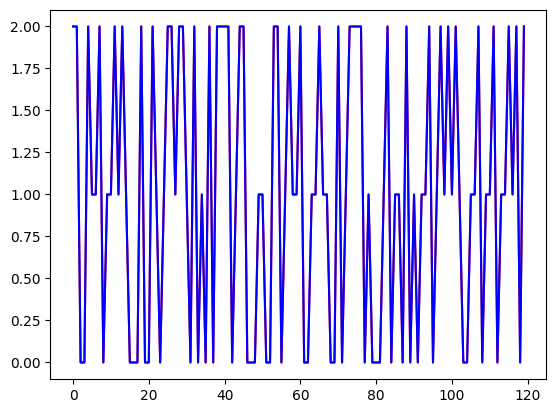

In [9]:
# Plot test accuracy
plt.plot(y_train_pred,color='r')
plt.plot(y_train,color='b')

In [10]:
# Calculate test accuracy
err=0
for i in range(len(y_test_pred)):
    if y_test_pred[i]==y_test[i]: err+=1
print(f"Test data accuracy is {err/len(y_test_pred)*100}")

Test data accuracy is 96.66666666666667


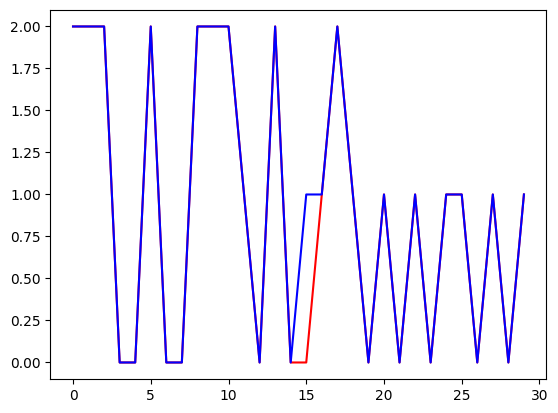

In [11]:
# Plot test accuracy
plt.plot(y_test_pred,color='r')
plt.plot(y_test,color='b')